<h1><center>Natural Language Processing</center></h1>

<h3><center>NLP 09</center></h3>

![hM0xGrmJw](https://miro.medium.com/max/720/1*PGB0w1JZslqA-hM0xGrmJw.gif)

# Topics
1.	Introduction to Natural Language Processing
2.	Why learn NLP?
3.	Let's start playing with Python!
4.	Text Wrangling and Cleansing
 - Sentence splitter
 - Tokenization
 - Stemming         
 - Lemmatization    
 - Stop word removal
 - Diving into NLTK
5.	Vectorizing with Python
 - Count Vectorizer 
 - TF-IDF Vectorizer
6.	Modelling with Python 
 - Classification
 - Clustering
 - Sentiment Analysis <---------------------------------------------------- **This is where we are**


# Dictionary Based Sentiment Analysis

In [48]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [49]:
# nltk.download('opinion_lexicon') #Download Opinion Dictionary
positive_wds = set(opinion_lexicon.positive())
negative_wds = set(opinion_lexicon.negative())

In [50]:
positive_wds

{'kindliness',
 'adventurous',
 'elegant',
 'spellbindingly',
 'crisp',
 'exemplar',
 'succeeded',
 'solicitous',
 'courageous',
 'hard-working',
 'saint',
 'top-quality',
 'simplest',
 'brilliance',
 'exultingly',
 'tantalize',
 'hallmarks',
 'joyously',
 'enticingly',
 'indulgence',
 'heroically',
 'cornerstone',
 'amicably',
 'saintliness',
 'reforming',
 'reputation',
 'genial',
 'happily',
 'envious',
 'credence',
 'prefer',
 'civilize',
 'success',
 'excitedly',
 'outshone',
 'reasonably',
 'counter-attacks',
 'admire',
 'articulate',
 'sincerity',
 'complementary',
 'glow',
 'rejuvenated',
 'ameliorate',
 'amity',
 'peerless',
 'tough',
 'amuse',
 'confident',
 'entertain',
 'steadfastness',
 'handsome',
 'remunerate',
 'majesty',
 'nicest',
 'insightful',
 'streamlined',
 'easiness',
 'well',
 'trophy',
 'stimulating',
 'chivalrous',
 'playful',
 'exultation',
 'afford',
 'fearlessly',
 'vouchsafe',
 'gainfully',
 'fertile',
 'enviously',
 'guarantee',
 'audibly',
 'greatest',


In [51]:
negative_wds

{'disputed',
 'scandalized',
 'ache',
 'haters',
 'indeterminate',
 'leaking',
 'perturb',
 'uneconomical',
 'confession',
 'overloaded',
 'irony',
 'lawbreaker',
 'puny',
 'indecorum',
 'utterly',
 'inability',
 'susceptible',
 'molest',
 'unimaginably',
 'downcast',
 'ambivalent',
 'insincere',
 'aggressive',
 'scornfully',
 'provoke',
 'pitiable',
 'scare',
 'dejectedly',
 'melancholy',
 'mortify',
 'disrespectablity',
 'disadvantage',
 'sufferer',
 'incorrigible',
 'merciless',
 'detesting',
 'reproachful',
 'flares',
 'pretend',
 'regreted',
 'dispensable',
 'delusional',
 'leery',
 'mischievous',
 'runaway',
 'exorbitant',
 'problematic',
 'radicalization',
 'scorchingly',
 'hollow',
 'violent',
 'tormented',
 'untrustworthy',
 'implication',
 'foolishly',
 'infidels',
 'pestilent',
 'tortured',
 'traumatically',
 'bristle',
 'scared',
 'grievous',
 'crueler',
 'defiance',
 'shit',
 'brusque',
 'uncaring',
 'shortsightedness',
 'unwillingly',
 'envious',
 'incorrectly',
 'miscell

In [55]:
# This is how you check, if a word is in a dictionary or not
'bo' in positive_wds

False

## Let's try

![](https://media.tenor.com/uVRxyYWMOa8AAAAC/cat-black-cat.gif)

In [75]:
def score_sent(sent):
    """Returns a score btw -1 and 1"""
    # Converting to lower
    sent = sent.lower()
    
    # Concerting to words
    words = word_tokenize(sent)
    
#     sent = [e.lower() for e in sent if e.isalnum()]
    total = len(words)
    
    temp = []
    for i in words:
        if i in positive_wds:
            temp.append(1)
        elif i in negative_wds:
            temp.append(-1)
        else:
            temp.append(0)
           
    score = sum(temp) / len(temp)
    return score


In [76]:
score_sent('This is a happy sad sentence, i am in a good mood today')

0.07142857142857142

In [77]:
random_text = '''Colin Robert Chase (February 5, 1935 – October 13, 1984) was an American academic. An associate professor of English at the University of Toronto, he was known for his contributions to the studies of Old English and Anglo-Latin literature. His best-known work, The Dating of Beowulf, challenged the accepted orthodoxy of the dating of the Anglo-Saxon poem Beowulf, which was then thought to be a date in the latter half of the eighth century but now thought to be near the end of the first millennium, and he left behind what was described in A Beowulf Handbook as "a cautious and necessary incertitude".[1][2] Born in Denver, Chase was one of three sons of a newspaper executive and a Pulitzer Prize-winning playwright, Mary Coyle Chase. Chase's two brothers became actors; he considered such a career, but ultimately studied English literature, classics, and philosophy. He received his Bachelor of Arts from Harvard University, Master of Arts from Saint Louis and Johns Hopkins Universities, and Ph.D. from the University of Toronto in 1971, the same year the university named him an assistant professor. In addition to The Dating of Beowulf, Chase penned Two Alcuin Letter-Books—a scholarly collection of twenty-four letters by the eighth-century scholar Alcuin. He also wrote some eight articles and chapters, contributed to the Dictionary of the Middle Ages, and for nearly a decade wrote the Beowulf section of "This Year's Work in Old English Studies" for the Old English Newsletter. Chase died of cancer in 1984, shortly before his anticipated promotion to full professor.'''

In [78]:
score_sent(random_text)

0.010101010101010102

In [79]:
import pandas as pd
df = pd.read_csv('SPAM text.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
df['Message'].apply(score_sent)

0       0.041667
1       0.000000
2       0.055556
3       0.000000
4       0.000000
          ...   
5567    0.085714
5568    0.000000
5569   -0.066667
5570    0.074074
5571    0.000000
Name: Message, Length: 5572, dtype: float64

In [81]:
df['Sentiment'] = df['Message'].apply(score_sent)

In [82]:
df.head()

,Category,Message,Sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",0.041667
1,ham,Ok lar... Joking wif u oni...,0.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.055556
3,ham,U dun say so early hor... U c already then say...,0.000000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000


In [35]:
df['Sentiment']

0       0.041667
1       0.000000
2       0.054054
3       0.000000
4       0.000000
          ...   
5567    0.085714
5568    0.000000
5569   -0.066667
5570    0.074074
5571    0.000000
Name: Sentiment, Length: 5572, dtype: float64

<AxesSubplot:>

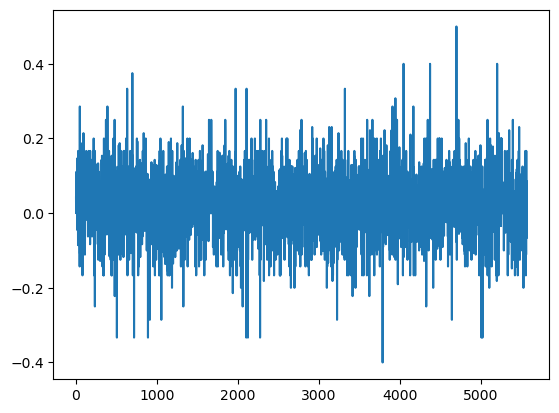

In [37]:
df['Sentiment'].plot()

In [38]:
df['Sentiment'] > 0

0        True
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570     True
5571    False
Name: Sentiment, Length: 5572, dtype: bool

In [39]:
df[df['Sentiment'] > 0]

,Category,Message,Sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",0.041667
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.054054
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0.076923
6,ham,Even my brother is not like to speak with me. ...,0.111111
8,spam,WINNER!! As a valued network customer you have...,0.093750
...,...,...,...
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...,0.069767
5563,ham,Ard 6 like dat lor.,0.166667
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,0.066667
5567,spam,This is the 2nd time we have tried 2 contact u...,0.085714


In [40]:
df[df['Sentiment'] < 0]

,Category,Message,Sentiment
17,ham,Eh u remember how 2 spell his name... Yes i di...,-0.045455
19,spam,England v Macedonia - dont miss the goals/team...,-0.035714
25,ham,Just forced myself to eat a slice. I'm really ...,-0.085714
31,ham,Yeah he got in at 2 and was v apologetic. n ha...,-0.020833
33,ham,For fear of fainting with the of all that hous...,-0.055556
...,...,...,...
5535,ham,"I know you are thinkin malaria. But relax, chi...",-0.044776
5558,ham,"Sorry, I'll call later",-0.166667
5559,ham,if you aren't here in the next &lt;#&gt; hou...,-0.050000
5561,ham,Get me out of this dump heap. My mom decided t...,-0.111111


In [42]:
df[df['Sentiment'] == 0]

,Category,Message,Sentiment
1,ham,Ok lar... Joking wif u oni...,0.0
3,ham,U dun say so early hor... U c already then say...,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0.0
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0.0
...,...,...,...
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,0.0
5564,ham,Why don't you wait 'til at least wednesday to ...,0.0
5565,ham,Huh y lei...,0.0
5568,ham,Will ü b going to esplanade fr home?,0.0


In [83]:
def sentiment_classifier(x):
    temp = 0
    if x > 0:
        temp = 1
    elif x < 0:
        temp = -1
    else:
        temp = 0
    return temp

In [86]:
sentiment_classifier(.00)

0

In [87]:
df['Sentiment'].apply(sentiment_classifier)

0       1
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569   -1
5570    1
5571    0
Name: Sentiment, Length: 5572, dtype: int64

In [88]:
df['Sentiment_class'] = df['Sentiment'].apply(sentiment_classifier)

In [89]:
df

,Category,Message,Sentiment,Sentiment_class
0,ham,"Go until jurong point, crazy.. Available only ...",0.041667,1
1,ham,Ok lar... Joking wif u oni...,0.000000,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.055556,1
3,ham,U dun say so early hor... U c already then say...,0.000000,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.085714,1
5568,ham,Will ü b going to esplanade fr home?,0.000000,0
5569,ham,"Pity, * was in mood for that. So...any other s...",-0.066667,-1
5570,ham,The guy did some bitching but I acted like i'd...,0.074074,1


In [49]:
df['Sentiment_class'].value_counts()

 0    2946
 1    1821
-1     805
Name: Sentiment_class, dtype: int64

<AxesSubplot:>

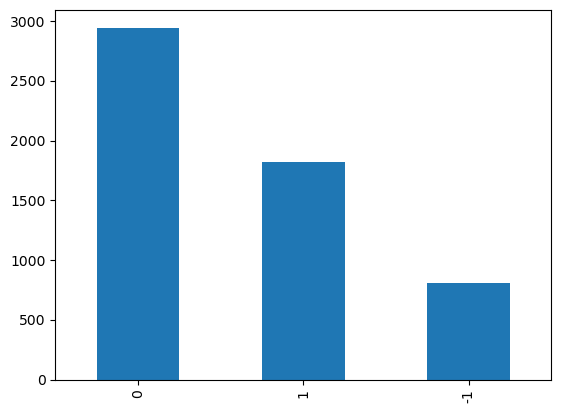

In [50]:
df['Sentiment_class'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sentiment_class'>

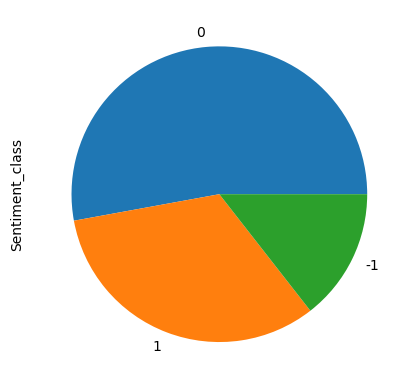

In [51]:
df['Sentiment_class'].value_counts().plot(kind='pie')

# Well, well well

![](https://media.tenor.com/Vz0ScNMhdzsAAAAM/benedict-cumberbatch-well-done.gif)

# We have achieved our very 1st task

## You all now know how to do a sentiment anaysis on text

# Now, all that remains is 
- Classification
- Clustering

# For that, we will first need to cover some ML. Onwards

![](https://media.tenor.com/khFYlvYDWA8AAAAC/napoleon-gosh.gif)

## What is encoding
- Label Encoding
- One Hot Encoding

# Label Encoder

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
le.fit(['a', 'b', 'c', 'd'])

LabelEncoder()

In [92]:
le.classes_

array(['a', 'b', 'c', 'd'], dtype='<U1')

In [93]:
le.transform(['b', 'a', 'c', 'd'])

array([1, 0, 2, 3])

In [94]:
le.inverse_transform([0, 1, 2, 3])

array(['a', 'b', 'c', 'd'], dtype='<U1')

# One Hot Encoding

In [95]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [96]:
enc = OneHotEncoder()
# X = np.array(X)
# X = X.reshape(-1,1)

In [101]:
X = [['a'],['b'],['c'],['d']]

In [102]:
enc.fit(X)

OneHotEncoder()

In [103]:
enc.categories_

[array(['a', 'b', 'c', 'd'], dtype=object)]

In [104]:
enc.transform([['a'],['b'],['c'],['d']]).toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [105]:
enc.inverse_transform([[0, 1, 0, 0], [0, 0, 1, 0]])

array([['b'],
       ['c']], dtype=object)

In [106]:
# enc.get_feature_names_out(['Female', 'Male'])

# Labelled vs Unlabelled

You will find 2 types of datasets out and about in the wild.
1. Labelled data
2. Unlabelled data

## Unlabelled 
When you are dealing with data, that does not has any category/label attached to the rows, this is called unlabelled data.

Here is an example. 

Imagine if this was your dataset

In [115]:
df[['Message']]

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


This is Unlabelled data

## Labelled 
When you are dealing with data, that has category/label attached to all the rows, this is called labelled data.

Here is an example.

Imagine if this was your dataset

In [117]:
df[['Message','Category']]

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


# Train-test split

When we are training our ML models. We train them on our dataset. But, we need a way for us to check if our models are correct or not. 
- For this to work, we need to set-aside some of our data, that we can use later.
- We do not use this set-aside data for training the model.
- Once the model is trained, we ask it to predict on this set-aside data.
- Now remember, we know internally what this set-aside data's real value is.
- But we let the model make it's predictions
- Now, since we have the model predictions and also the real values. 

We can compare both to get 
- Accuracy
- True Positive
- True Negative
- False Positive
- False Negative

# Confusion Matrix
Plotting these 4, gives us 'Confusion Matrix'
- True Positive
- True Negative
- False Positive
- False Negative

In [120]:
#Let's say these are our predictions
prediction = [0,1,1,1,0,0,0,0,1]
real_values = [1,1,0,1,1,0,0,1,0]

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
confusion_matrix(real_values, prediction)

array([[2, 2],
       [3, 2]])

In [124]:
cm = confusion_matrix(real_values, prediction)

In [127]:
cm

array([[2, 2],
       [3, 2]])

<AxesSubplot:>

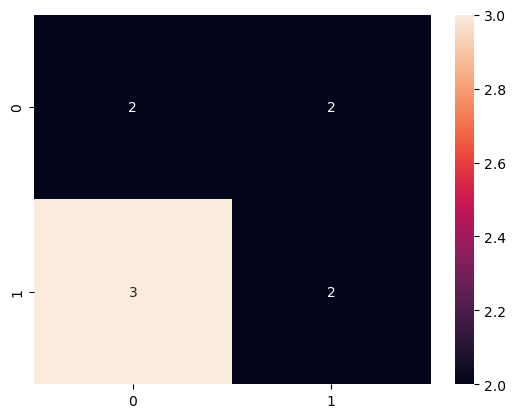

In [137]:
sns.heatmap(cm, annot=True)

---

![](https://media.tenor.com/XMbnmzECouIAAAAC/black-cat-the-end.gif)